# Imports

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants

In [37]:
TOKEN_SPAM_PROB_FILE = '03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = '03_Testing/prob-ham.txt'
TOKEN_ALL_PROB_FILE = '03_Testing/prob-all-tokens.txt'
TEST_TARGET_FILE = '03_Testing/test_target.txt'
TEST_FEATURE_MATRIX = '03_Testing/test_features.txt'

VOCAB_SIZE = 2500

# Load the data

In [38]:
#features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
#Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
#tokens
prob_token_spam=np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham=np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens=np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [39]:
prob_token_spam.shape

(2500,)

In [40]:
X_test.shape

(1724, 2500)

## Dot product

In [41]:
X_test.dot(prob_token_spam).shape

(1724,)

### Set the prior

In [42]:
PROB_SPAM = 0.311
np.log(PROB_SPAM)

-1.1679623668029029

In [43]:
np.log(prob_all_tokens)

array([-4.02585271, -4.80268234, -4.88026804, ..., -9.71165398,
       -9.60245468, -9.56855313])

In [44]:
np.log(prob_token_spam)

array([-4.40767023, -5.25374503, -4.99014747, ..., -9.60938491,
       -9.04976912, -9.79170647])

In [45]:
X_test

array([[0., 0., 1., ..., 0., 0., 0.],
       [6., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 4., 0., ..., 0., 0., 0.],
       [2., 2., 0., ..., 0., 0., 0.],
       [1., 9., 1., ..., 0., 0., 0.]])

## Joint Probability in log format 

In [46]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens) + np.log(PROB_SPAM))
joint_log_spam

array([ -184.80186742,   -43.39346799,   -50.66048614, ...,
       -1060.30406818,   -43.77704384,  -377.16661856])

In [49]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens) + np.log(1-PROB_SPAM))
joint_log_ham[0]

-127.63965633804193

# Making Predictions
### Checking for higher probability

### P(Spam|X)>P(Ham|X) or P(Spam|X)<P(Ham|X)

In [52]:
predictions=joint_log_spam>joint_log_ham

In [55]:
predictions[-5:]*1

array([0, 0, 0, 0, 0])

In [54]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

## Accuracy

In [60]:
correct_docs = (predictions == y_test).sum()
correct_docs/len(X_test)

0.7708816705336426

In [58]:
fraction_wrong= (len(X_test)-correct_docs)/len(X_test)
fraction_wrong

0.2291183294663573

## Visualizing the data

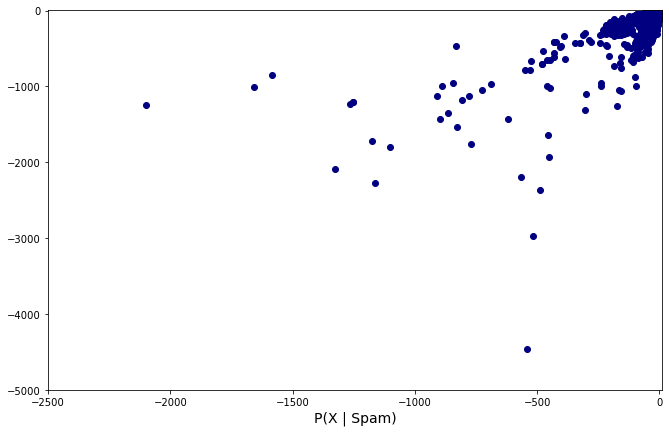

In [65]:
plt.figure(figsize=(11,7))
plt.xlabel('P(X | Nonspam)', fontsize=14)
plt.xlabel('P(X | Spam)', fontsize=14)

plt.xlim([-2500, 10])
plt.ylim([-5000, 10])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## Decision boundary

In [74]:
linedata = np.linspace(start=-14000, stop=1, num=1000)

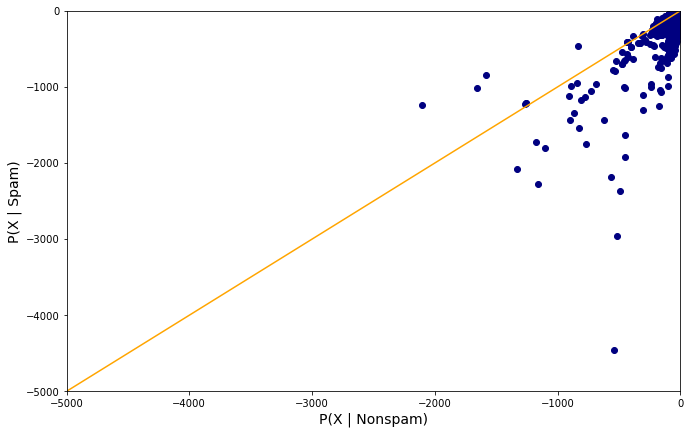

In [76]:
plt.figure(figsize=(11,7))
plt.xlabel('P(X | Nonspam)', fontsize=14)
plt.ylabel('P(X | Spam)', fontsize=14)

plt.xlim([-5000, 1])
plt.ylim([-5000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.plot(linedata, linedata, color='orange')
plt.show()

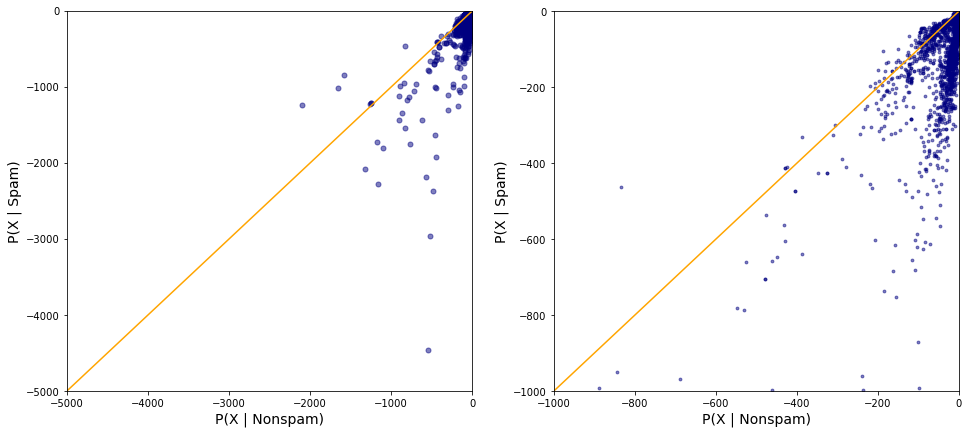

In [81]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
plt.xlabel('P(X | Nonspam)', fontsize=14)
plt.ylabel('P(X | Spam)', fontsize=14)

plt.xlim([-5000, 1])
plt.ylim([-5000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='orange')

plt.subplot(1,2,2)
plt.xlabel('P(X | Nonspam)', fontsize=14)
plt.ylabel('P(X | Spam)', fontsize=14)

plt.xlim([-1000, 1])
plt.ylim([-1000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', alpha=0.5, s=8)
plt.plot(linedata, linedata, color='orange')

plt.show()

In [83]:
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({'P(X | Spam)': joint_log_spam, 'P(X | Nonspam)': joint_log_ham, labels: y_test})

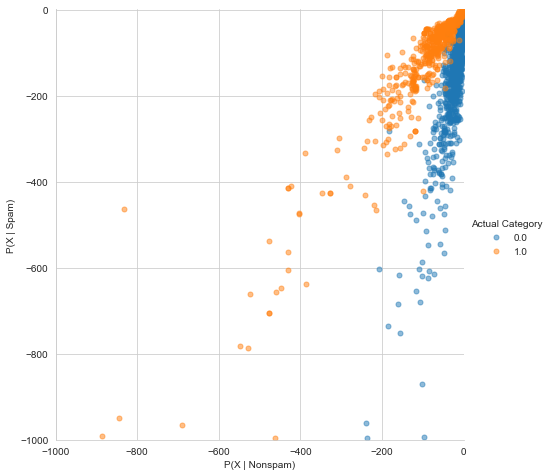

In [86]:
sns.lmplot(x='P(X | Nonspam)', y='P(X | Spam)', data=summary_df, height=6.5, fit_reg=False, 
           scatter_kws={'alpha':0.5, 's': 25},hue=labels)
plt.xlim([-1000, 1])
plt.ylim([-1000, 1])
plt.show()

### False negatives and false positives

In [88]:
np.unique(predictions, return_counts=True)

(array([False,  True]), array([1530,  194], dtype=int64))

In [92]:
true_pos = (predictions == 1) & (y_test==1)
true_pos.sum()

194

In [93]:
false_pos = (predictions == 1) & (y_test==0)
false_pos.sum()

0

In [95]:
false_neg = (predictions == 0) & (y_test==1)
false_neg.sum()

395

In [96]:
true_neg = (predictions == 0) & (y_test==0)
true_neg.sum()

1135

## recall score

In [97]:
recall_score = true_pos.sum()/(true_pos.sum()+false_neg.sum())
recall_score

0.3293718166383701

## Precision metric

In [98]:
pres_score = true_pos.sum()/(true_pos.sum()+false_pos.sum())
pres_score

1.0

## F Score

In [101]:
f_score = 2* ((pres_score*recall_score)/(pres_score+recall_score))
f_score

0.4955300127713921